# 머신러닝 개요와 선형회귀

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

style_name = 'bmh' #bmh
mpl.style.use(style_name)
np.set_printoptions(precision=4, linewidth =150)

style = plt.style.library[style_name]
style_colors = [ c['color'] for c in style['axes.prop_cycle'] ]

## 수업 범위

### 데어터과학 벤다이어그램


- 본 수업의 범위는 다음으로 한정하기로 한다.
    - 데이터 과학보다는 머신러닝에 집중 
    - 도메인 전문 지식은 다루지 않음


<img src="imgs/03-Data_Science_VD.png" width="450"/>
<h5 align="center">http://drewconway.com/zia/2013/3/26/the-data-science-venn-diagram</h5>

## 머신러닝?

- 최근 각광받고 있는 머신러닝이란 기술의 넓은 의미는 다음처럼 정의할 수 있다. 
 
 - 컴퓨터를 이용한 문제 해결에 있어서 지식기반, 규칙 기반 방법이 아닌 데이터와 범용 알고리즘으로 퍼포먼스를 개선하는 방법 


> Tom Mitchell (1998) : Well-posed Learning Problem: A computer program is said to learn from experience E with respect to some task T and some performance measure P, if its performance on T, as measured by P, improves with experience E.<br/>-“Machine Learning”, Coursera, Andrew Ng

- 조금 더 특정하자면 어떤 작업(task T)를 정의하고 이 작업의 퍼포먼스를 측정(measure P)하고 반복되는 경험(experience E)를 통해 퍼포먼스를 개선하는 일련의 과정을 일컫는다. 

- 우리 수업에서는 조금 더 좁은 의미로 머신러닝을 다루게 되는데 바로 "주어진 데이터를 가장 잘 표현하는 함수를 찾는 것"이다.


## 아이가 그림을 그린다면?

<table>
    <tr>
        <td><img src="imgs/sketch-01.png" width="350"/></td>
        <td><img src="imgs/sketch-02.png" width="350"/></td>
    </tr>
    <tr>
        <td><img src="imgs/sketch-03.png" width="350"/></td>
        <td><img src="imgs/sketch-04.png" width="350"/></td>
    </tr>
</table>

- 아이가 위 점들을 다 연결하지는 못해도 점들과 가장 비슷한 선하나를 그려보라고 하면 아이는 T, P, E를 반복하면서 적합한 선을 그리는 법을 배워갈 것이다. (실제로는 머리속에서 반복과정을 모두 거친 다음 바로 최적의 직선을 그리겠지만...)


- 여기에서 T, P, E는 다음과 같이 정의 될 수 있다.
    - Task T  : 선을 그린다.
    - Measure P : 선이 점에 잘 맞는가?
    - Experience E : 만족할 때 까지 계속 선을 그린다. 빨간점에서 선이 멀어지면 좋지 않다.


- 이 과정은 우리 수업의 목적인 선형회귀를 수행하는 알고리즘과 정확히 동일한 과정이며 수업을 통해 이 과정들이 어떻게 수학적으로 정의되고 풀려지는지 알아보도록 하자.

## 머신러닝 분류

### 지도학습Supervised

#### 회귀 문제Regression : 선형 회귀Linear Regression

- 정답 : 연속된 실수
- 예 : 대지면적에 따른 집값, 시간에 따른 트랜지스터 집적 개수, 기온에 따른 빙과류 판매량

<img src="imgs/05-gaussian-linreg.png"/>

#### 분류 문제Classification : 로지스틱 회귀Logistic Regression

- 정답 : (0,1) 또는 (0, 1, …, K)
- 예 : 개-고양이 분류, 양성종양-악성종양 분류, …

<img src="imgs/04-logistic-sklearn.png"/>
<h5 align="center">http://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html#sphx-glr-auto-examples-linear-model-plot-iris-logistic-py</h5>


### 비지도학습Unsupervised

- K-means, PCA, kNN ......

## 직선찾기

- 5주간 배울 선형회귀를 직접 실험해보자. 

### 데이터 준비

- 머신러닝 온라인 강의로 가장 유명한 앤드류 응 교수의 코세라 강의 '머신러닝'에서 사용하는 데이터를 'data_1d.npz'로 만들어 `class-01`폴더에 저장


In [2]:
# 데이터 로드
D = np.load('data_1d.npz')

# X : (N,2), y : (N,1)
X = D['X']
y = D['y']

In [3]:
X

array([[ 1.    ,  6.1101],
       [ 1.    ,  5.5277],
       [ 1.    ,  8.5186],
       [ 1.    ,  7.0032],
       [ 1.    ,  5.8598],
       [ 1.    ,  8.3829],
       [ 1.    ,  7.4764],
       [ 1.    ,  8.5781],
       [ 1.    ,  6.4862],
       [ 1.    ,  5.0546],
       [ 1.    ,  5.7107],
       [ 1.    , 14.164 ],
       [ 1.    ,  5.734 ],
       [ 1.    ,  8.4084],
       [ 1.    ,  5.6407],
       [ 1.    ,  5.3794],
       [ 1.    ,  6.3654],
       [ 1.    ,  5.1301],
       [ 1.    ,  6.4296],
       [ 1.    ,  7.0708],
       [ 1.    ,  6.1891],
       [ 1.    , 20.27  ],
       [ 1.    ,  5.4901],
       [ 1.    ,  6.3261],
       [ 1.    ,  5.5649],
       [ 1.    , 18.945 ],
       [ 1.    , 12.828 ],
       [ 1.    , 10.957 ],
       [ 1.    , 13.176 ],
       [ 1.    , 22.203 ],
       [ 1.    ,  5.2524],
       [ 1.    ,  6.5894],
       [ 1.    ,  9.2482],
       [ 1.    ,  5.8918],
       [ 1.    ,  8.2111],
       [ 1.    ,  7.9334],
       [ 1.    ,  8.0959],
 

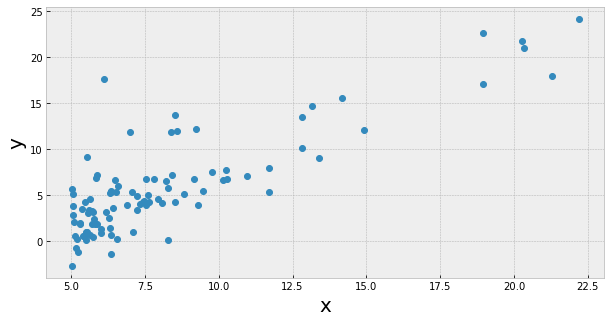

In [4]:
plt.figure(figsize=(10,5))
plt.plot(X[:,1], y, 'o')
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.show()

- 데이터를 보면 점들의 분포가 직선을 띄고있는 것을 확인할 수 있다.

- 이 점들의 분포를 잘 반영하는 직선을 찾아보자.

- 앞서 살펴본 아이의 직선그리기 처럼 아무선이나 그리고 그 선이 잘 그려졌는지 평가하고 평가를 개선할 수 있는 방향으로 선긋기를 반복한다. 

- 점의 분포상 모든 점을 지나는 직선은 그릴 수 없으니 우선 선을 그려보고 점과 선과의 거리를 최대한 줄여보자. 

- 컴퓨터로 문제를 풀때 실제로 선을 그리는 것은 아니고 직선의 방정식을 이용하는데 우리가 익히 아는 적선의 방정식은 다음과 같은 형태이다.

$$
h = w_1 x + w_0
$$

- 보통은 $y=ax+b$로 더 많이 표현하지만 여기서는 $y, a,b$대신 $h, w_0, w_1$을 사용하였다. 

- $h$는 우리가 정한 직선의 방정식이 일종의 가설이라는 의미를 나타내기 위한 것으로 hypothesis의 약자이다. 

- 방정식의 계수를 $w$로 표현한것은 입력에 대한 가중치weight라는 의미를 강조하기 위한 것이다.

- 여기서 우리는 회귀를 위한 가설의 형태를 직선으로 가정하였다. 

- 다시말해 입력과 출력이 직선의 형태를 띄는 함수 $h = w_0 + w_1 x$를 선택한 것이다. 

- 가설은 단어의 의미 그대로 여러 형태로 결정될 수 있는데 직선형태 뿐만 아니라 곡선 또는 신경망 형태로도 정할 수 있다.




- 이제 T, P, E를 정해보면 다음과 같을 것이다.
    - Task T  : 선을 그린다. 선을 그린다는 것은 식 $h=w_0 + w_1 x$에서 $w_0$와 $w_1$을 결정하는 것을 의미한다.
    - Measure P : 선과 점의 수직거리의 총합 $\to$ 작을 수 록 좋다!!
    - Experience E : 선을 그리고 P를 측정하기를 반복



<img src="imgs/lin-reg-concept.png" width="650"/>

- 위 그림의 두 직선에 해당하는 에러량은 직선과 점사이의 수직거리이고 모든 점에서 이를 다 더한 값이다. 

- 두 직선에서 다른 것은 직선의 위치와 기울기를 결정하는 계수 벡터 $\color{Green}{\mathbf{w}_g}$, $\color{Red}{\mathbf{w}_r}$ 이고

- **이 계수 벡터가 에러를 최소화하기 위해 우리가 결정해야 할 것들이다.**

$$
\color{Green}{\text{ERROR}} = \frac{1}{2N} \sum_{n=1}^N \left\{ \color{Green}{h(x_n, \mathbf{w}_{g})}  - \color{RoyalBlue}{y_n} \right\}^2 
$$

$$
\color{Red}{\text{ERROR}} = \frac{1}{2N} \sum_{n=1}^N \left\{ \color{Red}{h(x_n, \mathbf{w}_{r})}  - \color{RoyalBlue}{y_n} \right\}^2 
$$


- 이상의 개념에 포함된 수학과 구현을 수업을 통해 배우게 됨.


- 여기서는 우선 어떤 방식으로 문제를 푸는지 다음과 같은 두가지 방식에 대해서 간단히 데모용 코드를 보고 넘어가기로 하자.
    - 경사하강법을 이용한 방법
    - 정규방적식을 이용한 방법
    
    

### 경사하강법을 이용한 선형회귀


- 다음 코드는 경사하강법을 통해 선형회귀를 수행한 것이다. 

- 핵심코드는 다음 3줄로 여기에 행렬과 벡터의 연산, 미분, 최적화 내용이 들어 있다고 보면 된다.

```python
for i in range(num_iters) :
    #           이 부분에 미분과 선형대수의 개념이 있음
    c = (1/n) * np.dot(X.T, np.dot(X,w) - y)
    # 이 부분에 최적화의 개념이 있음
    w -= alpha * c
```

- 아래 코드는 경사하강법을 이용한 선형회귀 데모 코드이다. 


- 과정을 애니메이션으로 보기 위해 `conda` 가상환경에서 다음을 입력하여 `ffmpeg` 패키지를 설치 한다.
    - `conda install -c conda-forge ffmpeg`

Regression coef. w0=-1.155223, w1=0.917715


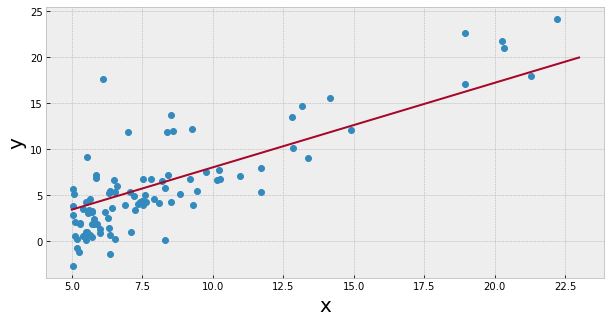

In [5]:
# 여기서 바로 애니메이션으로 만들기
from matplotlib import animation, rc
from IPython.display import HTML

num_iters = 1500
n = X.shape[0]
w_grad = np.array([[20.0],[-1.0]])
alpha = 0.008
ws = [np.copy(w_grad)]

# 여기서 우리의 경험 E를 반복하면서 태스크 T를 개선해 나간다.
for i in range(num_iters) :
    #           이 부분에 미분과 선형대수의 개념이 있음
    c = (1/n) * np.dot(X.T, np.dot(X, w_grad) - y)
    # 이 부분에 최적화의 개념이 있음
    w_grad -= alpha * c
    ws.append(np.copy(w_grad))

print("Regression coef. w0={:f}, w1={:f}".format(w_grad[0,0], w_grad[1,0]))

fig, ax = plt.subplots(figsize=(10,5))
x = np.linspace(5, 23, 100)
points, = ax.plot(X[:,1], y, 'o')
pred = ws[-1][0]+ ws[-1][1]*x
line,  = ax.plot(x, pred)
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)

plt.show()


### 정규방정식을 이용한 선형회귀

- 최적화를 수행할 때 경우에 따라서는 위처럼 반복적으로 결과를 개선해가지 않고 한번에 답을 찾을 수가 있다. 

- 다음 공식을 사용하는 것인데 이런 방법을 정규방정식을 이용한다고 한다.

$$
\mathbf{w} = \left(\mathbf{X}^{\text{T}}\mathbf{X}\right)^{-1} \mathbf{X}^{\text{T}} \mathbf{y}
$$


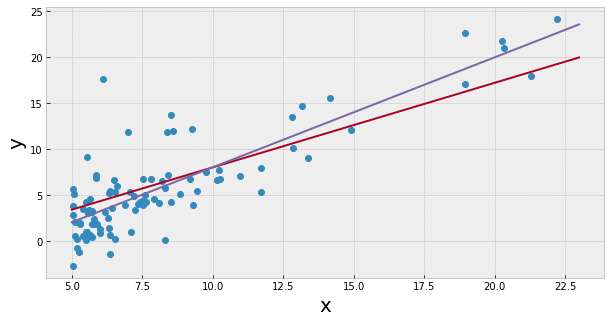

Regression coef. w0=-3.895781, w1=1.193034


In [6]:
w_normal = np.linalg.solve(np.dot(X.T,X), np.dot(X.T,y))

x = np.linspace(5, 23, 100)

pred_grad   = ws[-1][0,0] + ws[-1][1,0]*x
pred_normal = w_normal[0,0]+ w_normal[1,0]*x

plt.figure(figsize=(10,5))
plt.plot(X[:,1], y, 'o', x, pred_grad, x, pred_normal)
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.show()

print("Regression coef. w0={:f}, w1={:f}".format(w_normal[0,0], w_normal[1,0]))

- 두 결과를 비교하면 거의 비슷한 결과를 얻을 수 있음을 알 수 있다. 

- 경사하강법과 정규방정식의 결과가 다른것은 경사하강법이 충분히 반복되지 않아 완전한 최적해로 수렴이 되지 않았기 때문이다.

## 목표

- 다음 식을 적어도 “합리적 수준”에서 이해하고 구현하기 위해……

$$
\begin{aligned}
\mathbf{w} &= \mathbf{w} - \alpha \frac{\partial}{\partial \mathbf{w}} \left( \frac{1}{2N} \sum_{n=1}^N \{ h(x_n, \mathbf{w})- y_n \}^2 \right) \\[15pt]
\mathbf{w} &= \left(\mathbf{X}^{\text{T}}\mathbf{X}\right)^{-1} \mathbf{X}^{\text{T}} \mathbf{y}
\end{aligned}
$$

- 1. 파이썬 기본 문법을 익히고, 
- 2. 함수, 미분, 행렬과 벡터의 연산, 최적화 이론을 공부하는 것


In [ ]:
from IPython.core.display import HTML

def _set_css_style(css_file_path):
   """
   Read the custom CSS file and load it into Jupyter.
   Pass the file path to the CSS file.
   """
   styles = open(css_file_path, "r").read()
   s = '<style>%s</style>' % styles     
   return HTML(s)

_set_css_style("../style.css")